In [1]:
%matplotlib inline
import glob
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import os
import time
from lmfit import Parameter, Parameters, Minimizer
from lsst.obs.lsst import LsstCamMapper as camMapper
from lsst.obs.lsst.cameraTransforms import LsstCameraTransforms

from itertools import product

from mixcoatl.gridFitTask import GridFitTask, DistortedGrid
from mixcoatl.sourcegrid import coordinate_distances, fit_error

import warnings
warnings.simplefilter('error', RuntimeWarning)

camera = camMapper._makeCamera()
lct = LsstCameraTransforms(camera)

## Test Partial Fit (Example 1)

2010.1444287631398 -74.21484258461642 -0.051199137592910594
[[ 4.59513515e-06 -3.51688987e-03 -1.82980861e-03]
 [-3.51688987e-03  1.26564702e+01  1.31581858e+00]
 [-1.82980861e-03  1.31581858e+00  5.64984398e+00]]


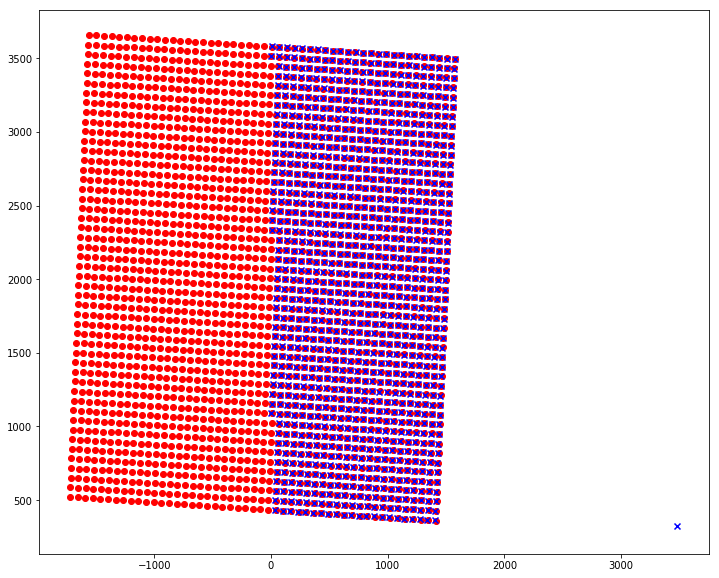

In [3]:
infiles = glob.glob('/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_-41.4_-233.1_017/*.cat')
infile0 = infiles[0]

src0 = fits.getdata(infile0)
all_src0Y = src0['base_SdssCentroid_Y']
all_src0X = src0['base_SdssCentroid_X']

## Curate data here (remove bad shapes, fluxes, etc.)
mask = (src0['base_SdssShape_XX'] > 4.5)*(src0['base_SdssShape_XX'] <7.) \
    * (src0['base_SdssShape_YY'] > 4.5)*(src0['base_SdssShape_YY'] <7.)

src0Y = all_src0Y[mask]
src0X = all_src0X[mask]

gridfit_task = GridFitTask()
gridfit_task.config.brute_search = True
gridfit_task.config.vary_theta = True
gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

grid0, result0 = gridfit_task.run(infile0, (2000., -80))
print(grid0.y0, grid0.x0, grid0.theta)
g0Y, g0X = grid0.get_source_centroids(distorted=False)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.scatter(g0X, g0Y, color='red', marker='o')
ax.scatter(src0X, src0Y, color='blue', marker='x')

print(result0.covar)

In [ ]:
infile1 = infiles[1]
print(infile1)

src1 = fits.getdata(infile1)
all_src1Y = src1['base_SdssCentroid_Y']
all_src1X = src1['base_SdssCentroid_X']

## Curate data here (remove bad shapes, fluxes, etc.)
mask = (src1['base_SdssShape_XX'] > 4.5)*(src1['base_SdssShape_XX'] <7.) \
    * (src1['base_SdssShape_YY'] > 4.5)*(src1['base_SdssShape_YY'] <7.)

src1Y = all_src1Y[mask]
src1X = all_src1X[mask]

gridfit_task = GridFitTask()
gridfit_task.config.brute_search = True
gridfit_task.config.vary_theta = True
gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

grid1, result1 = gridfit_task.run(infile1, (2020, 4170))
print(grid1.y0, grid1.x0, grid1.theta)
g1Y, g1X = grid1.get_source_centroids(distorted=True)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.scatter(g1X, g1Y, color='red')
ax.scatter(src1X, src1Y, color='blue', marker='x')

print(result1.covar)

/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_-41.4_-233.1_017/R20_S02_source_catalog.cat


## Test Partial Fit (Example 2)

In [ ]:
infiles = glob.glob('/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_-20.4_-212.1_009/*.cat')
infile0 = infiles[0]

src0 = fits.getdata(infile0)
all_src0Y = src0['base_SdssCentroid_Y']
all_src0X = src0['base_SdssCentroid_X']

## Curate data here (remove bad shapes, fluxes, etc.)
mask = (src0['base_SdssShape_XX'] > 4.5)*(src0['base_SdssShape_XX'] <7.) \
    * (src0['base_SdssShape_YY'] > 4.5)*(src0['base_SdssShape_YY'] <7.)

src0Y = all_src0Y[mask]
src0X = all_src0X[mask]

gridfit_task = GridFitTask()
gridfit_task.config.brute_search = True
gridfit_task.config.vary_theta = True
gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

grid0, result0 = gridfit_task.run(infile0, (4100, 2050))
print(grid0.y0, grid0.x0, grid0.theta)
g0Y, g0X = grid0.get_source_centroids(distorted=False)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.scatter(g0X, g0Y, color='red', marker='o')
ax.scatter(src0X, src0Y, color='blue', marker='x')

print(result0.covar)

In [ ]:
infile1 = infiles[1]
print(infile1)

src1 = fits.getdata(infile1)
all_src1Y = src1['base_SdssCentroid_Y']
all_src1X = src1['base_SdssCentroid_X']

## Curate data here (remove bad shapes, fluxes, etc.)
mask = (src1['base_SdssShape_XX'] > 4.5)*(src1['base_SdssShape_XX'] <7.) \
    * (src1['base_SdssShape_YY'] > 4.5)*(src1['base_SdssShape_YY'] <7.)

src1Y = all_src1Y[mask]
src1X = all_src1X[mask]

gridfit_task = GridFitTask()
gridfit_task.config.brute_search = True
gridfit_task.config.vary_theta = True
gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

grid1, result1 = gridfit_task.run(infile1, (-100, 2050))
print(grid1.y0, grid1.x0, grid1.theta)
g1Y, g1X = grid1.get_source_centroids(distorted=True)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.scatter(g1X, g1Y, color='red')
ax.scatter(src1X, src1Y, color='blue', marker='x')

print(result1.covar)

# Explore Parameter Space

In [8]:
infile = infiles[1]
y0_guess, x0_guess = (2032, 4137)

## Keywords for catalog
x_kwd = 'base_SdssCentroid_X'
y_kwd = 'base_SdssCentroid_Y'
xx_kwd = 'base_SdssShape_XX'
yy_kwd = 'base_SdssShape_YY'

## Get source positions for fit
with fits.open(infile) as src:

    all_srcY = src[1].data[y_kwd]
    all_srcX = src[1].data[x_kwd]

    ## Curate data here (remove bad shapes, fluxes, etc.)
    mask = (src[1].data['base_SdssShape_XX'] > 4.5)*(src[1].data['base_SdssShape_XX'] <7.) \
        * (src[1].data['base_SdssShape_YY'] > 4.5)*(src[1].data['base_SdssShape_YY'] <7.)

    srcY = all_srcY[mask]
    srcX = all_srcX[mask]

## Perform grid fit
ncols = nrows = 49

## Calculate mean xstep/ystep
nsources = srcY.shape[0]
indices, distances = coordinate_distances(srcY, srcX, srcY, srcX)
nn_indices = indices[:, 1:5]
nn_distances = distances[:, 1:5]
med_dist = np.median(nn_distances)

dist1_array = np.full(nsources, np.nan)
dist2_array = np.full(nsources, np.nan)
theta_array = np.full(nsources, np.nan)

for i in range(nsources):

    yc = srcY[i]
    xc = srcX[i]

    for j in range(4):

        nn_dist = nn_distances[i, j]
        if np.abs(nn_dist - med_dist) > 10.: continue
        y_nn = srcY[nn_indices[i, j]]
        x_nn = srcX[nn_indices[i, j]]

        if x_nn > xc:
            if y_nn > yc:
                dist1_array[i] = nn_dist
                theta_array[i] = np.arctan((y_nn-yc)/(x_nn-xc))
            else:
                dist2_array[i] = nn_dist

## Use theta to determine x/y step direction
theta = np.nanmedian(theta_array)
if theta >= np.pi/4.:
    theta = theta - (np.pi/2.)
    xstep = np.nanmedian(dist2_array)
    ystep = np.nanmedian(dist1_array)
else:
    xstep = np.nanmedian(dist1_array)
    ystep = np.nanmedian(dist2_array)

print(y0_guess, x0_guess, theta)

y0_steps = np.arange(-ystep/2., ystep/2.+5, ystep/8.)+y0_guess
x0_steps = np.arange(-xstep/2., xstep/2.+5, xstep/8.)+x0_guess

res = np.zeros((y0_steps.shape[0], x0_steps.shape[0]))
print(res.shape)

for i, y0 in enumerate(y0_steps):
    
    for j, x0 in enumerate(x0_steps):

    ## Define fit parameters
        params = Parameters()
        params.add('ystep', value=ystep, vary=False)
        params.add('xstep', value=xstep, vary=False)
        params.add('theta', value=theta, vary=False)
        params.add('y0', value=y0, vary=True)
        params.add('x0', value=x0, vary=True)

        res[i, j] = np.sum(np.square(fit_error(params, srcY, srcX, nrows, ncols)))

2032 4137 -0.054917315366293185
(9, 9)


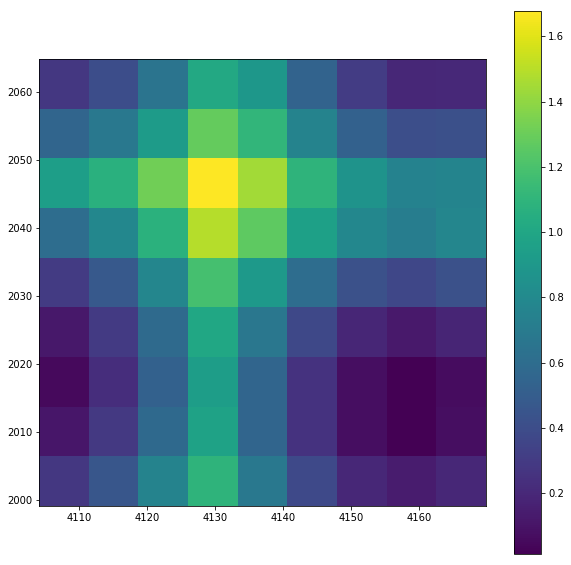

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
im = ax.imshow(res, origin='lower', extent=[x0_guess-xstep/2., x0_guess+xstep/2., y0_guess-ystep/2., y0_guess+ystep/2.])
fig.colorbar(im)

## Make Optic Distortions

In [ ]:
old_infiles = glob.glob('/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6865D_dither/raw_data/*.fits')

xstep = np.zeros(len(old_infiles))
ystep = np.zeros(len(old_infiles))
theta = np.zeros(len(old_infiles))

for i, infile in enumerate(old_infiles):

    with fits.open(infile) as hdul:
        ## Read input file
        hdul = fits.open(infile)
        grid_dy = hdul[1].header['DY']
        grid_dx = hdul[1].header['DX']
        grid_theta = hdul[1].header['THETA']
        
        xstep[i] = grid_dx
        ystep[i] = grid_dy
        theta[i] = grid_theta
        
mean_xstep = np.mean(xstep)
mean_ystep = np.mean(ystep)
mean_theta = np.mean(theta)

print(mean_xstep, mean_ystep, mean_theta)

In [ ]:
## Get old optic distortion file
hdul = fits.open('corrected_grid_pt_average_displacement.fits')

dx = hdul[0].data[:, 0]
dy = hdul[0].data[:, 1]

centroid_shifts = (dy, dx)

optics_grid = DistortedGrid(mean_ystep, mean_xstep, mean_theta, 0, 0, 49, 49)
optics_grid.add_centroid_shifts((dy, dx))
#optics_grid.write_fits('optics_distorted_grid.fits', overwrite=True)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

gY, gX = optics_grid.get_source_centroids(distorted=False)
gDY, gDX = optics_grid.get_centroid_shifts()

ax.quiver(gX, gY, gDX, gDY)
print(optics_grid.norm_dy)

In [ ]:
## Rotate by 45 degrees
optics_grid.theta += np.pi/4

gY, gX = optics_grid.get_source_centroids(distorted=False)
gDY, gDX = optics_grid.get_centroid_shifts()
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
ax.quiver(gX, gY, gDX, gDY)
print(optics_grid.norm_dy)

## Adding Matched Catalog

In [ ]:
infiles = glob.glob('/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6861D_long/catalogs/*.cat')
infile = infiles[0]
print(infile)

src = fits.open(infile)

In [ ]:
tablehdu = src[1].data
print(src[1].columns)
print(tablehdu)

# Archive